In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

### Fielding Data.  
We'll use it to determine primary player position, and to determine number of games played at tough defensive positions.

In [2]:
fielding_df = pd.read_csv("db/Fielding.csv")
xyz = ["playerID","yearID","POS","G"]
fielding_df = fielding_df[xyz]
fielding_df.head()

,playerID,yearID,POS,G
0,abercda01,1871,SS,1
1,addybo01,1871,2B,22
2,addybo01,1871,SS,3
3,allisar01,1871,2B,2
4,allisar01,1871,OF,29


In [3]:
# First, copy games played into dedicated columns per position
fielding_df["Games_P"]  = np.where(fielding_df["POS"]=="P",fielding_df["G"],0)
fielding_df["Games_C"]  = np.where(fielding_df["POS"]=="C",fielding_df["G"],0)
fielding_df["Games_1B"] = np.where(fielding_df["POS"]=="1B",fielding_df["G"],0)
fielding_df["Games_2B"] = np.where(fielding_df["POS"]=="2B",fielding_df["G"],0)
fielding_df["Games_3B"] = np.where(fielding_df["POS"]=="3B",fielding_df["G"],0)
fielding_df["Games_SS"] = np.where(fielding_df["POS"]=="SS",fielding_df["G"],0)
fielding_df["Games_OF"] = np.where(fielding_df["POS"]=="OF",fielding_df["G"],0)
fielding_df.head()

,playerID,yearID,POS,G,Games_P,Games_C,Games_1B,Games_2B,Games_3B,Games_SS,Games_OF
0,abercda01,1871,SS,1,0,0,0,0,0,1,0
1,addybo01,1871,2B,22,0,0,0,22,0,0,0
2,addybo01,1871,SS,3,0,0,0,0,0,3,0
3,allisar01,1871,2B,2,0,0,0,2,0,0,0
4,allisar01,1871,OF,29,0,0,0,0,0,0,29


sum them up per player per year, which will be easier to handle when we eventually find career statistics

In [4]:
posYrG_df = fielding_df.groupby(["playerID","yearID"], as_index=False).sum()
posYrG_df.head(20)

,playerID,yearID,G,Games_P,Games_C,Games_1B,Games_2B,Games_3B,Games_SS,Games_OF
0,aardsda01,2004,11,11,0,0,0,0,0,0
1,aardsda01,2006,45,45,0,0,0,0,0,0
2,aardsda01,2007,25,25,0,0,0,0,0,0
3,aardsda01,2008,47,47,0,0,0,0,0,0
4,aardsda01,2009,73,73,0,0,0,0,0,0
5,aardsda01,2010,53,53,0,0,0,0,0,0
6,aardsda01,2012,1,1,0,0,0,0,0,0
7,aardsda01,2013,43,43,0,0,0,0,0,0
8,aardsda01,2015,33,33,0,0,0,0,0,0
9,aaronha01,1954,116,0,0,0,0,0,0,116


Drop fielding games, so that it's not confused with an existing batting games field.  

In [5]:
del posYrG_df["G"]
posYrG_df.head()

,playerID,yearID,Games_P,Games_C,Games_1B,Games_2B,Games_3B,Games_SS,Games_OF
0,aardsda01,2004,11,0,0,0,0,0,0
1,aardsda01,2006,45,0,0,0,0,0,0
2,aardsda01,2007,25,0,0,0,0,0,0
3,aardsda01,2008,47,0,0,0,0,0,0
4,aardsda01,2009,73,0,0,0,0,0,0


Now, sum them up per player ...

In [6]:
fielding2_df = fielding_df.groupby(["playerID"], as_index=False).sum()


In [7]:
fielding2_df.head(30)

,playerID,yearID,G,Games_P,Games_C,Games_1B,Games_2B,Games_3B,Games_SS,Games_OF
0,aardsda01,18084,331,331,0,0,0,0,0,0
1,aaronha01,70739,3020,0,0,210,43,7,0,2760
2,aaronto01,35389,387,0,0,232,7,10,0,138
3,aasedo01,25786,448,448,0,0,0,0,0,0
4,abadan01,6007,9,0,0,8,0,0,0,1
5,abadfe01,18124,363,363,0,0,0,0,0,0
6,abadijo01,3750,12,0,0,12,0,0,0,0
7,abbated01,32383,830,0,0,0,419,20,388,3
8,abbeybe01,11365,79,79,0,0,0,0,0,0
9,abbeych01,11371,452,1,0,0,0,0,0,451


... and then find out which is the highest.

In [8]:
positions = []
names = []
for index, player in fielding2_df.iterrows():
    test_games = player["Games_P"]
    posit = "P"
    if player["Games_C"] > test_games:
        posit = "C"
        test_games = player["Games_C"]
    if player["Games_1B"] > test_games:
        posit = "1B"
        test_games = player["Games_1B"]
    if player["Games_2B"] > test_games:
        posit = "2B"
        test_games = player["Games_2B"]
    if player["Games_3B"] > test_games:
        posit = "3B"
        test_games = player["Games_3B"]
    if player["Games_SS"] > test_games:
        posit = "SS"
        test_games = player["Games_SS"]
    if player["Games_OF"] > test_games:
        posit = "OF"
        test_games = player["Games_OF"]
    positions.append(posit)
    names.append(player["playerID"])
    
positions_dict = {"playerID": names,
                  "Pos": positions
                 }
positions_df = pd.DataFrame(positions_dict)
        
positions_df.head(10)

,playerID,Pos
0,aardsda01,P
1,aaronha01,OF
2,aaronto01,1B
3,aasedo01,P
4,abadan01,1B
5,abadfe01,P
6,abadijo01,1B
7,abbated01,2B
8,abbeybe01,P
9,abbeych01,OF


### Win Shares Data.  


In [9]:
WS_df = pd.read_csv("db/WinShares.csv")
WS_df.head(10)

,playerID,yearID,year WS
0,aaronha01,1954,13
1,aaronha01,1955,29
2,aaronha01,1956,30
3,aaronha01,1957,35
4,aaronha01,1958,32
5,aaronha01,1959,38
6,aaronha01,1960,35
7,aaronha01,1961,35
8,aaronha01,1962,34
9,aaronha01,1963,41


In [10]:
# summarize by career as well
WS_Career_df = WS_df.groupby(["playerID"],as_index=False).sum()
del WS_Career_df["yearID"]

In [11]:
WS_Career_df = WS_Career_df.rename(
    columns={"year WS":"careerWS"})

WS_Career_df.columns

Index(['playerID', 'careerWS'], dtype='object')

### Batting Data.  
This will be the source of our statistics.

In [12]:
batting_df = pd.read_csv("db/Batting.csv")

Since we aren't concerned about per-team statistics, let's combine all multiple-stint years into one row.

In [13]:
batting_df = batting_df.groupby(["playerID","yearID"],as_index=False).sum()
batting_df.head(10)

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aardsda01,2004,1,11,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,aardsda01,2006,1,45,2,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0
2,aardsda01,2007,1,25,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,aardsda01,2008,1,47,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
4,aardsda01,2009,1,73,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,aardsda01,2010,1,53,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
6,aardsda01,2012,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
7,aardsda01,2013,1,43,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,aardsda01,2015,1,33,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
9,aaronha01,1954,1,122,468,58,131,27,6,13,69.0,2.0,2.0,28,39.0,0.0,3.0,6.0,4.0,13.0


But first, one more thing.  We'll use At Bats to determine players' most dominent decade.

In [14]:
decades_df = batting_df[["playerID", "yearID", "AB"]]
decades_df

,playerID,yearID,AB
0,aardsda01,2004,0
1,aardsda01,2006,2
2,aardsda01,2007,0
3,aardsda01,2008,1
4,aardsda01,2009,0
5,aardsda01,2010,0
6,aardsda01,2012,0
7,aardsda01,2013,0
8,aardsda01,2015,1
9,aaronha01,1954,468


In [15]:
x = decades_df.loc[:, "yearID"] / 10
decades_df.loc[:, "decade"] = 10 * x.round()
decades_df.head()

C:\Users\Laptop 1\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Laptop 1\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,playerID,yearID,AB,decade
0,aardsda01,2004,0,2000.0
1,aardsda01,2006,2,2010.0
2,aardsda01,2007,0,2010.0
3,aardsda01,2008,1,2010.0
4,aardsda01,2009,0,2010.0


In [16]:
decades_df = decades_df.groupby(["playerID", "decade"], as_index=False).sum()
decades_df.head()

,playerID,decade,yearID,AB
0,aardsda01,2000.0,2004,0
1,aardsda01,2010.0,14065,3
2,aardsda01,2020.0,2015,1
3,aaronha01,1950.0,1954,468
4,aaronha01,1960.0,21560,6612


In [17]:
decades_df = decades_df.sort_values(["playerID","AB"], ascending=[True, False]).reset_index()
decades_df.head()

,index,playerID,decade,yearID,AB
0,1,aardsda01,2010.0,14065,3
1,2,aardsda01,2020.0,2015,1
2,0,aardsda01,2000.0,2004,0
3,4,aaronha01,1960.0,21560,6612
4,5,aaronha01,1970.0,17730,4548


Keep the first occurance of each player.  Having sorted the data in descending order of at bats, that would be the player's dominant decade.

In [18]:
decades = []
names = []
prevname = ''
for index, player in decades_df.iterrows():
    if player["playerID"] != prevname:
        names.append(player["playerID"])
        decades.append(player["decade"])
        prevname=player["playerID"]
      
decades2_dict = {"playerID": names,
                  "decade": decades}
decades2_df = pd.DataFrame(decades2_dict)
        

In [19]:
decades2_df.head(10)

,playerID,decade
0,aardsda01,2010.0
1,aaronha01,1960.0
2,aaronto01,1960.0
3,aasedo01,1990.0
4,abadan01,2000.0
5,abadfe01,2010.0
6,abadijo01,1880.0
7,abbated01,1900.0
8,abbeybe01,1890.0
9,abbeych01,1900.0


Oh, and one more thing.  We need to know the last year a player was active, so that we know if they are even eligible for the Hall of Fame.

In [20]:
years_df = batting_df[["playerID", "yearID"]]
# drop duplicates that exist because a player might play for more than one team in any given year
years_df = years_df.drop_duplicates()
lastyear_df = years_df.groupby(["playerID"], as_index=False).max(axis="yearID")
lastyear_df = lastyear_df.rename(columns={"yearID":"lastyear"})
lastyear_df.head(20)

,playerID,lastyear
0,aardsda01,2015
1,aaronha01,1976
2,aaronto01,1971
3,aasedo01,1990
4,abadan01,2006
5,abadfe01,2017
6,abadijo01,1875
7,abbated01,1910
8,abbeybe01,1896
9,abbeych01,1897


In [21]:
# also need number of seasons
numyear_df = years_df.groupby(["playerID"], as_index=False).count()
numyear_df = numyear_df.rename(columns={"yearID":"numyears"})
numyear_df.head(15)

,playerID,numyears
0,aardsda01,9
1,aaronha01,23
2,aaronto01,7
3,aasedo01,13
4,abadan01,3
5,abadfe01,8
6,abadijo01,1
7,abbated01,9
8,abbeybe01,5
9,abbeych01,5


In [22]:
batting_df.columns

Index(['playerID', 'yearID', 'stint', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP'],
      dtype='object')

### Now, it's time to put it all together

In [23]:
batting_df = pd.merge(batting_df, positions_df, on="playerID", how="left")
batting_df = pd.merge(batting_df, WS_df, on=["playerID", "yearID"], how="left")
batting_df = pd.merge(batting_df, WS_Career_df, on="playerID", how="left")
batting_df = pd.merge(batting_df, decades2_df, on="playerID", how="left")
batting_df = pd.merge(batting_df, lastyear_df, on="playerID", how="left")
batting_df = pd.merge(batting_df, numyear_df, on="playerID", how="left")
batting_df = pd.merge(batting_df, posYrG_df, on=["playerID", "yearID"], how="left")

In [24]:
batting_df.columns

Index(['playerID', 'yearID', 'stint', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'Pos',
       'year WS', 'careerWS', 'decade', 'lastyear', 'numyears', 'Games_P',
       'Games_C', 'Games_1B', 'Games_2B', 'Games_3B', 'Games_SS', 'Games_OF'],
      dtype='object')

Now we start cutting back players we won't be considering.

First, discard pitchers, who would need to be considered under different criteria and whose batting statistics would be irrelevant in any case.

In [25]:
batting2_df = batting_df.loc[batting_df["Pos"] != "P", :]

In [26]:
# discard players from early eras
batting2_df = batting2_df.loc[batting_df["decade"] > 1910, :]

In [27]:
# fewer than ten years would not be enough data to judge a player
batting2_df = batting2_df.loc[batting_df["numyears"] > 9, :]

In [28]:
# discard low-impact players
batting2_df = batting2_df.loc[batting_df["careerWS"] > 75, :]

In [29]:
batting2_df["wsPerYr"] = batting2_df["careerWS"] / batting2_df["numyears"]

In [30]:
batting2_df = batting2_df.loc[batting2_df["wsPerYr"] > 10, :]

In [31]:
batting2_df.columns

Index(['playerID', 'yearID', 'stint', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'Pos',
       'year WS', 'careerWS', 'decade', 'lastyear', 'numyears', 'Games_P',
       'Games_C', 'Games_1B', 'Games_2B', 'Games_3B', 'Games_SS', 'Games_OF',
       'wsPerYr'],
      dtype='object')

In [32]:
# drop columns which are no longer needed

del batting2_df ["Games_P"]
del batting2_df ["Games_OF"]
del batting2_df ["Games_1B"]
del batting2_df ["Pos"]
del batting2_df ["careerWS"]
del batting2_df ["decade"]
del batting2_df ["numyears"]
del batting2_df ["wsPerYr"]
del batting2_df ["stint"]
del batting2_df ["CS"]
del batting2_df ["SO"]
del batting2_df ["IBB"]
del batting2_df ["GIDP"]



In [33]:
batting2_df["PA"] = batting2_df["AB"] + batting2_df["BB"] + batting2_df["HBP"] + batting2_df["SH"] + batting2_df["SF"]

In [34]:
# 495 plate appearances to qualify for computed statistics
batting2_df["AVG"]  = np.where(batting2_df["PA"] > 495,batting2_df["H"]/batting2_df["AB"],0)
batting2_df["SLG"]  = np.where(batting2_df["PA"] > 495,
                              (batting2_df["H"]+batting2_df["2B"]+2*batting2_df["3B"]+3*batting2_df["HR"])/batting2_df["AB"],0)

Recognize seasonal accomplishments by awarding points for meeting certain thresholds

In [35]:
p_avg = []
p_hits = []
p_runs = []
p_rbi = []
p_hr = []
p_2b = []
p_sb = []
p_slg = []
for index, player in batting2_df.iterrows():
    px_avg = 0
    px_hits = 0
    px_runs = 0
    px_rbi = 0
    px_hr = 0
    px_2b = 0
    px_sb = 0
    px_slg = 0
    
    player_avg = player["AVG"]
    player_h   = player["H"]
    player_r   = player["R"]
    player_rbi = player["RBI"]
    player_hr  = player["HR"]
    player_2b  = player["2B"]
    player_sb  = player["2B"]
    player_slg = player["SLG"]
    
    if player_avg > .400:
        px_avg = 15
    elif player_avg > .350:
        px_avg = 5
    elif player_avg > .300:
        px_avg = 2.5
        
    if player_h > 199:
        px_hits = 5
        
    if player_r  > 99:
        px_runs = 3
    if player_rbi > 99:
        px_rbi = 3
        
    if player_hr > 49:
        px_hr = 10
    elif player_hr > 39:
        px_hr = 4
    elif player_hr > 29:
        px_hr = 2
        
    if player_2b > 44:
        px_2b = 2
    elif player_2b > 34:
        px_2b = 1
        
    if player_sb > 74:
        px_sb = 2
    elif player_sb > 39:
        px_sb = 1
        
    if player_slg > .650:
        px_slg = 4
    elif player_slg > .550:
        px_slg = 2
        
        
    p_avg.append(px_avg)
    p_hits.append(px_hits)
    p_runs.append(px_runs)
    p_rbi.append(px_rbi)    
    p_hr.append(px_hr)
    p_2b.append(px_2b)
    p_sb.append(px_sb)
    p_slg.append(px_slg)
    
batting2_df["pts_avg"] = p_avg
batting2_df["pts_hits"] = p_hits
batting2_df["pts_runs"] = p_runs
batting2_df["pts_rbi"] = p_rbi
batting2_df["pts_hr"] = p_hr
batting2_df["pts_2b"] = p_2b
batting2_df["pts_sb"] = p_sb
batting2_df["pts_slg"] = p_slg


What we are doing now is to find and keep the first 10 "significant" batting seasons for each player.

In [36]:
# To be "significant", the player must have appeared in over 45 games
batting3_df = batting2_df.loc[batting2_df["G"] > 45, :]

In [37]:
batting3_df = batting3_df.sort_values(["playerID", "yearID"], ascending=[True,True])

In [38]:
season_num = []
prev_playerID = " "
for index, player in batting3_df.iterrows():
    if player["playerID"] == prev_playerID:
        season += 1
        season_app = season
    else:
        prev_playerID = player["playerID"]
        season = 1
        season_app = 1
        
    # Babe Ruth is a special case, in that his early seasons were spent mostly pitching.
    if player["playerID"] == "ruthba01":
        if player["yearID"] < 1919:
            season = 0
            season_app = 99
            
    season_num.append(season_app)
            
batting3_df["seasonNum"] = season_num
batting3_df = batting3_df.loc[batting3_df["seasonNum"] < 11, :]
            

In [39]:
#batting3_df.to_csv("db/batting3.csv", index=False, header=True)

Summarize the batting data into player data

In [40]:
batting3_df = batting3_df.groupby(["playerID"],as_index=False).sum()
batting3_df.head(10)

,playerID,yearID,G,AB,R,H,2B,3B,HR,RBI,...,SLG,pts_avg,pts_hits,pts_runs,pts_rbi,pts_hr,pts_2b,pts_sb,pts_slg,seasonNum
0,aaronha01,19585,1511,5940,1077,1898,321,77,342,1121.0,...,5.690842,22.5,15,27,21,22,4,1,14,55
1,abreubo01,20015,1470,5254,950,1590,374,44,205,882.0,...,4.611408,12.5,0,18,15,4,11,5,2,55
2,adamssp01,19276,1295,5108,779,1472,230,45,9,364.0,...,2.511279,5.0,0,3,0,0,4,1,0,55
3,adcocjo01,19545,1128,3910,513,1106,198,26,181,637.0,...,1.569459,2.5,0,0,3,2,0,0,2,55
4,ageeto01,15756,1088,3840,553,987,168,27,129,425.0,...,1.749522,0.0,0,3,0,0,0,0,0,36
5,alfoned01,19995,1367,4930,736,1419,263,17,144,696.0,...,3.563004,10.0,0,6,3,0,2,2,0,55
6,allendi01,19685,1353,4961,884,1484,254,73,287,887.0,...,4.972878,12.5,5,6,9,12,1,0,12,55
7,alleyge01,19685,1178,3876,439,988,139,44,55,342.0,...,1.477546,0.0,0,0,0,0,0,0,0,55
8,allisbo01,19635,1402,4736,777,1216,202,51,247,762.0,...,4.313173,0.0,0,3,6,6,0,0,2,55
9,alomaro01,19925,1416,5460,893,1659,296,54,113,653.0,...,3.469854,7.5,0,9,0,0,3,2,0,55


In [41]:
# no longer needed, and their sums would not make sense any way
del batting3_df["yearID"]
del batting3_df["seasonNum"]

In [42]:
# computed fields must be re-computed - their sums wouldn't make any sense either
batting3_df["AVG"]  =  batting3_df["H"]/batting3_df["AB"]
batting3_df["SLG"]  = (batting3_df["H"]+batting3_df["2B"]+2*batting3_df["3B"]+3*batting3_df["HR"])/batting3_df["AB"]

In [43]:
batting3_df.head(10)

,playerID,G,AB,R,H,2B,3B,HR,RBI,SB,...,AVG,SLG,pts_avg,pts_hits,pts_runs,pts_rbi,pts_hr,pts_2b,pts_sb,pts_slg
0,aaronha01,1511,5940,1077,1898,321,77,342,1121.0,103.0,...,0.319529,0.572222,22.5,15,27,21,22,4,1,14
1,abreubo01,1470,5254,950,1590,374,44,205,882.0,271.0,...,0.302627,0.507613,12.5,0,18,15,4,11,5,2
2,adamssp01,1295,5108,779,1472,230,45,9,364.0,151.0,...,0.288175,0.356108,5.0,0,3,0,0,4,1,0
3,adcocjo01,1128,3910,513,1106,198,26,181,637.0,9.0,...,0.282864,0.485678,2.5,0,0,3,2,0,0,2
4,ageeto01,1088,3840,553,987,168,27,129,425.0,167.0,...,0.257031,0.415625,0.0,0,3,0,0,0,0,0
5,alfoned01,1367,4930,736,1419,263,17,144,696.0,51.0,...,0.287830,0.435700,10.0,0,6,3,0,2,2,0
6,allendi01,1353,4961,884,1484,254,73,287,887.0,103.0,...,0.299133,0.553316,12.5,5,6,9,12,1,0,12
7,alleyge01,1178,3876,439,988,139,44,55,342.0,63.0,...,0.254902,0.356037,0.0,0,0,0,0,0,0,0
8,allisbo01,1402,4736,777,1216,202,51,247,762.0,81.0,...,0.256757,0.477407,0.0,0,3,6,6,0,0,2
9,alomaro01,1416,5460,893,1659,296,54,113,653.0,322.0,...,0.303846,0.439927,7.5,0,9,0,0,3,2,0


At this point, introduce data to identify players as being in the Hall Of Fame or not

In [44]:
HOF_df = pd.read_csv("db/HallOfFame.csv")
HOF_df.head()

,playerID,yearID,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN


In [45]:
# unsuccessful votes are irrelevant for our purposes
HOF_subset1_df = HOF_df.loc[HOF_df["inducted"] == "Y", :]

# consider only those elected as players.  Some players were elected as managers.
HOF_subset2_df = HOF_subset1_df.loc[HOF_subset1_df["category"] == "Player", :]

# exclude any players elected from the Negro Leagues.  These are not likely to have relevant MLB statistics
HOF_subset3_df = HOF_subset2_df.loc[HOF_subset2_df["votedBy"] != "Negro League", :]


# discard unneeded columns
xyz = ["playerID","inducted"]
HOF_df = HOF_subset3_df[xyz]
HOF_df.head()

,playerID,inducted
0,cobbty01,Y
1,ruthba01,Y
2,wagneho01,Y
3,mathech01,Y
4,johnswa01,Y


In [46]:
batting3_df = pd.merge(batting3_df, HOF_df, on="playerID", how="left")
batting3_df.head()

,playerID,G,AB,R,H,2B,3B,HR,RBI,SB,...,SLG,pts_avg,pts_hits,pts_runs,pts_rbi,pts_hr,pts_2b,pts_sb,pts_slg,inducted
0,aaronha01,1511,5940,1077,1898,321,77,342,1121.0,103.0,...,0.572222,22.5,15,27,21,22,4,1,14,Y
1,abreubo01,1470,5254,950,1590,374,44,205,882.0,271.0,...,0.507613,12.5,0,18,15,4,11,5,2,NaN
2,adamssp01,1295,5108,779,1472,230,45,9,364.0,151.0,...,0.356108,5.0,0,3,0,0,4,1,0,NaN
3,adcocjo01,1128,3910,513,1106,198,26,181,637.0,9.0,...,0.485678,2.5,0,0,3,2,0,0,2,NaN
4,ageeto01,1088,3840,553,987,168,27,129,425.0,167.0,...,0.415625,0.0,0,3,0,0,0,0,0,NaN


We will need to convert the "inducted" to 1s and 0s

In [47]:
batting3_df["HOF_member"] = np.where(batting3_df["inducted"] == "Y",1,0)
batting3_df.head(15)

,playerID,G,AB,R,H,2B,3B,HR,RBI,SB,...,pts_avg,pts_hits,pts_runs,pts_rbi,pts_hr,pts_2b,pts_sb,pts_slg,inducted,HOF_member
0,aaronha01,1511,5940,1077,1898,321,77,342,1121.0,103.0,...,22.5,15,27,21,22,4,1,14,Y,1
1,abreubo01,1470,5254,950,1590,374,44,205,882.0,271.0,...,12.5,0,18,15,4,11,5,2,NaN,0
2,adamssp01,1295,5108,779,1472,230,45,9,364.0,151.0,...,5.0,0,3,0,0,4,1,0,NaN,0
3,adcocjo01,1128,3910,513,1106,198,26,181,637.0,9.0,...,2.5,0,0,3,2,0,0,2,NaN,0
4,ageeto01,1088,3840,553,987,168,27,129,425.0,167.0,...,0.0,0,3,0,0,0,0,0,NaN,0
5,alfoned01,1367,4930,736,1419,263,17,144,696.0,51.0,...,10.0,0,6,3,0,2,2,0,NaN,0
6,allendi01,1353,4961,884,1484,254,73,287,887.0,103.0,...,12.5,5,6,9,12,1,0,12,NaN,0
7,alleyge01,1178,3876,439,988,139,44,55,342.0,63.0,...,0.0,0,0,0,0,0,0,0,NaN,0
8,allisbo01,1402,4736,777,1216,202,51,247,762.0,81.0,...,0.0,0,3,6,6,0,0,2,NaN,0
9,alomaro01,1416,5460,893,1659,296,54,113,653.0,322.0,...,7.5,0,9,0,0,3,2,0,Y,1


In [48]:
batting3_df.columns

Index(['playerID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'BB',
       'HBP', 'SH', 'SF', 'year WS', 'lastyear', 'Games_C', 'Games_2B',
       'Games_3B', 'Games_SS', 'PA', 'AVG', 'SLG', 'pts_avg', 'pts_hits',
       'pts_runs', 'pts_rbi', 'pts_hr', 'pts_2b', 'pts_sb', 'pts_slg',
       'inducted', 'HOF_member'],
      dtype='object')

Columns with high correlation should not both be used.

In [49]:
pd.options.display.float_format = '{:,.2f}'.format

In [50]:
# create a work dataframe that will make seeing correlations a little easier
work_df = batting3_df[["R", "H", "2B", "HR", "RBI", "SB", "AVG", "SLG",
                  "pts_runs", "pts_hits", "pts_2b", "pts_hr", "pts_rbi", "pts_sb", "pts_avg", "pts_slg"]]

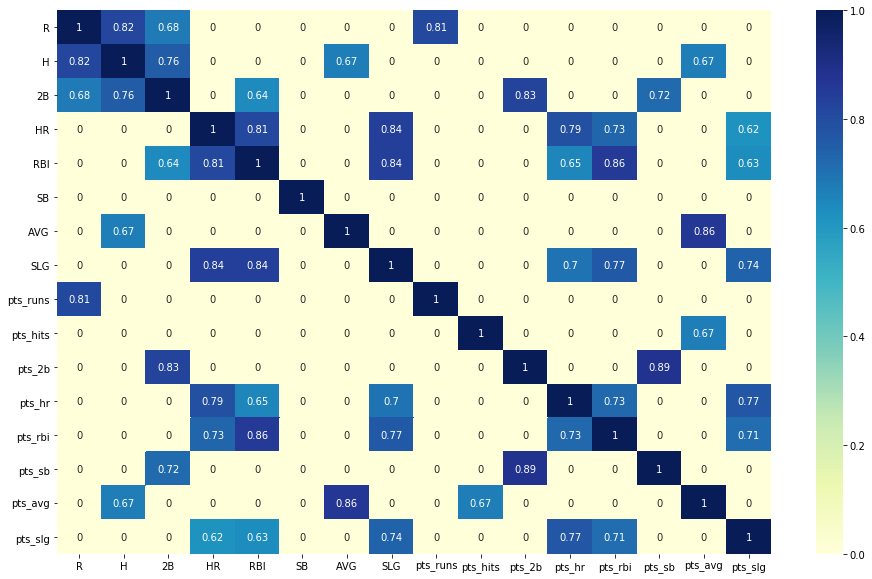

In [51]:
corr_matrix = work_df.corr()
corr_matrix[np.abs(corr_matrix) < .6] = 0      # masking lower correlations helps higher ones to stand out

plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

The most obvious thing we see here is that nearly all representations of seasonal accomplishments (pts_x) have a high correlation with their corresponding career fields.  So they can be discarded.

We see that Stolen Bases has no strong correlations with any other stat here, and Batting Average only with Hits so we will keep both of these.  So then we should discard Hits even if 3000 lifetime hits is a well-known career target achievement.

Next, remembering that doubles and home runs are components of slugging percent, my instinct tells me that we lose the least by dropping those two.

That leaves us with five stats:  Runs Scored, Runs Batted In, Stolen Bases, Batting Average, and Slugging Percent.  Between these five, there is a high correlation between just two:  RBI and Slugging Pct.  I'll tolerate that for now, and revisit it later if necessary.

-----
With that, we can cut down again on the number of columns we need to keep.  With a change this big, we'll move to the next generation (batting4),


In [52]:
xyz = ["playerID","R","RBI","SB","AVG","SLG","Games_C","Games_2B","Games_3B","Games_SS","HOF_member"]
batting4_df = batting3_df[xyz]
batting4_df.head()

,playerID,R,RBI,SB,AVG,SLG,Games_C,Games_2B,Games_3B,Games_SS,HOF_member
0,aaronha01,1077,"1,121.00",103.00,0.32,0.57,0.00,29.00,7.00,0.00,1
1,abreubo01,950,882.00,271.00,0.30,0.51,0.00,0.00,0.00,0.00,0
2,adamssp01,779,364.00,151.00,0.29,0.36,0.00,511.00,464.00,297.00,0
3,adcocjo01,513,637.00,9.00,0.28,0.49,0.00,0.00,0.00,0.00,0
4,ageeto01,553,425.00,167.00,0.26,0.42,0.00,0.00,0.00,0.00,0


In [53]:
pd.reset_option("display.float_format")

"lastyear" was polluted by being summed, but we still need it for one more thing.  Merge it back in from when it was last good, that being in batting2.

In [54]:
battingx_df = batting2_df[["playerID","lastyear"]]
battingx_df.drop_duplicates(inplace=True)
battingx_df.head(10)

C:\Users\Laptop 1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,playerID,lastyear
9,aaronha01,1976
194,abreubo01,2014
456,adamssp01,1934
491,adcocjo01,1966
590,ageeto01,1973
955,alfoned01,2006
1044,allendi01,1977
1156,alleyge01,1973
1176,allisbo01,1970
1275,alomaro01,2004


In [55]:
batting4_df = pd.merge(batting4_df, battingx_df, on="playerID", how="left")
batting4_df.head(20)

,playerID,R,RBI,SB,AVG,SLG,Games_C,Games_2B,Games_3B,Games_SS,HOF_member,lastyear
0,aaronha01,1077,1121.0,103.0,0.319529,0.572222,0.0,29.0,7.0,0.0,1,1976
1,abreubo01,950,882.0,271.0,0.302627,0.507613,0.0,0.0,0.0,0.0,0,2014
2,adamssp01,779,364.0,151.0,0.288175,0.356108,0.0,511.0,464.0,297.0,0,1934
3,adcocjo01,513,637.0,9.0,0.282864,0.485678,0.0,0.0,0.0,0.0,0,1966
4,ageeto01,553,425.0,167.0,0.257031,0.415625,0.0,0.0,0.0,0.0,0,1973
5,alfoned01,736,696.0,51.0,0.287830,0.435700,0.0,535.0,777.0,34.0,0,2006
6,allendi01,884,887.0,103.0,0.299133,0.553316,0.0,3.0,651.0,3.0,0,1977
7,alleyge01,439,342.0,63.0,0.254902,0.356037,0.0,126.0,24.0,973.0,0,1973
8,allisbo01,777,762.0,81.0,0.256757,0.477407,0.0,0.0,0.0,0.0,0,1970
9,alomaro01,893,653.0,322.0,0.303846,0.439927,0.0,1381.0,0.0,5.0,1,2004


------
Next will be to split off more recent players.  These are still active and recent retirees, and can be used to make and test predictions.

In [56]:
batting_recent_df = batting4_df.loc[batting4_df["lastyear"] > 2010, :]
batting4_df       = batting4_df.loc[batting4_df["lastyear"] < 2011, :]

At this point, the data is ready to be processed into a logistic regression.  Drop playerID and lastyear. 

In [57]:
del batting_recent_df["lastyear"]
del batting4_df["lastyear"]

In [58]:
fieldlist = ["R","RBI","SB","AVG","SLG", "Games_C","Games_2B","Games_3B", "Games_SS"]
X = batting4_df[fieldlist]
y = batting4_df["HOF_member"]

In [59]:
# split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=27)

In [60]:
# Normalize the data.  Here, we are using StandardScaler
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\Laptop 1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Laptop 1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\Laptop 1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [61]:
model = LogisticRegression(C=1.0, penalty='l2', random_state=0, solver="saga", max_iter=5000)

In [62]:
model.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test_scaled, y_test)

print(f"MSE: {MSE}, R2: {r2}") 

MSE: 0.06936416184971098, R2: 0.930635838150289


In [64]:
X_test.head()

,R,RBI,SB,AVG,SLG,Games_C,Games_2B,Games_3B,Games_SS
616,598,517.0,43.0,0.266578,0.375774,0.0,1134.0,50.0,19.0
571,611,696.0,23.0,0.261822,0.408527,0.0,0.0,0.0,0.0
562,934,629.0,126.0,0.303387,0.409610,0.0,914.0,219.0,234.0
849,715,797.0,47.0,0.267718,0.431503,105.0,0.0,1249.0,0.0
127,813,993.0,188.0,0.263167,0.471232,0.0,1.0,1.0,0.0


In [65]:
model.coef_

array([[0.91235254, 0.61498284, 0.3066806 , 1.00670502, 0.18968111,
        0.87990026, 0.35096109, 0.07268284, 0.77135093]])

If curious about which players in the test split were predicted for what, we can take these two outputs, import and pair them

In [66]:
X_test["predictions"] = predictions
X_test.head()

C:\Users\Laptop 1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,R,RBI,SB,AVG,SLG,Games_C,Games_2B,Games_3B,Games_SS,predictions
616,598,517.0,43.0,0.266578,0.375774,0.0,1134.0,50.0,19.0,0
571,611,696.0,23.0,0.261822,0.408527,0.0,0.0,0.0,0.0,0
562,934,629.0,126.0,0.303387,0.409610,0.0,914.0,219.0,234.0,1
849,715,797.0,47.0,0.267718,0.431503,105.0,0.0,1249.0,0.0,0
127,813,993.0,188.0,0.263167,0.471232,0.0,1.0,1.0,0.0,0


In [67]:
X_test.to_csv("db/Xtest.csv", index=False, header=True)

Here's what we've been waiting for:  Let's make Hall-Of-Fame predictions for more recent and current players.

In [68]:
recent_players = batting_recent_df["playerID"]
X_recent = batting_recent_df[fieldlist]

In [69]:
X_recent_scaled = X_scaler.transform(X_recent)

C:\Users\Laptop 1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [70]:
predictions_recent = model.predict(X_recent_scaled)

In [71]:
X_recent["predictions"] = predictions_recent
X_recent["playerID"] = recent_players

C:\Users\Laptop 1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
people_df = pd.read_csv("db/people.csv")

In [73]:
players_df = people_df[["playerID","nameFirst","nameLast"]]
players_df["nameFull"] = players_df["nameFirst"]+' '+players_df["nameLast"]
players_df.head()

C:\Users\Laptop 1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,playerID,nameFirst,nameLast,nameFull
0,aardsda01,David,Aardsma,David Aardsma
1,aaronha01,Hank,Aaron,Hank Aaron
2,aaronto01,Tommie,Aaron,Tommie Aaron
3,aasedo01,Don,Aase,Don Aase
4,abadan01,Andy,Abad,Andy Abad


In [74]:
Predicted_for_HOF = X_recent.loc[X_recent["predictions"] == 1, :]
Predicted_for_HOF = pd.merge(Predicted_for_HOF, players_df, on="playerID", how="left")
del Predicted_for_HOF["nameFirst"]
del Predicted_for_HOF["nameLast"]
display(Predicted_for_HOF)

,R,RBI,SB,AVG,SLG,Games_C,Games_2B,Games_3B,Games_SS,predictions,playerID,nameFull
0,950,882.0,271.0,0.302627,0.507613,0.0,0.0,0.0,0.0,1,abreubo01,Bobby Abreu
1,1023,980.0,272.0,0.280692,0.496555,0.0,0.0,0.0,0.0,1,beltrca01,Carlos Beltran
2,959,1026.0,74.0,0.300445,0.558522,0.0,0.0,0.0,0.0,1,berkmla01,Lance Berkman
3,879,937.0,181.0,0.304248,0.543913,0.0,0.0,112.0,0.0,1,braunry02,Ryan Braun
4,961,1123.0,33.0,0.318206,0.561010,0.0,0.0,541.0,0.0,1,cabremi01,Miguel Cabrera
5,876,904.0,48.0,0.309560,0.499410,0.0,1500.0,0.0,1.0,1,canoro01,Robinson Cano
6,912,492.0,285.0,0.283658,0.406996,0.0,36.0,0.0,1313.0,1,furcara01,Rafael Furcal
7,950,1051.0,166.0,0.325297,0.584110,0.0,0.0,0.0,0.0,1,guerrvl01,Vladimir Guerrero
8,1091,1076.0,36.0,0.332496,0.585099,0.0,0.0,0.0,0.0,1,heltoto01,Todd Helton
9,949,966.0,101.0,0.311412,0.531493,0.0,0.0,0.0,0.0,1,hollima01,Matt Holliday


In [75]:
Predicted_for_HOF = pd.merge(X_recent, players_df, on="playerID", how="left")
del Predicted_for_HOF["nameFirst"]
del Predicted_for_HOF["nameLast"]
del Predicted_for_HOF["playerID"]
Predicted_for_HOF.to_csv("batting picks.csv", index=False, header=True)

Plot some charts using both test and recent data

In [76]:
X_graph = pd.concat([X_test, X_recent],sort=True)
X_graph.head()

,AVG,Games_2B,Games_3B,Games_C,Games_SS,R,RBI,SB,SLG,playerID,predictions
616,0.266578,1134.0,50.0,0.0,19.0,598,517.0,43.0,0.375774,NaN,0
571,0.261822,0.0,0.0,0.0,0.0,611,696.0,23.0,0.408527,NaN,0
562,0.303387,914.0,219.0,0.0,234.0,934,629.0,126.0,0.409610,NaN,1
849,0.267718,0.0,1249.0,105.0,0.0,715,797.0,47.0,0.431503,NaN,0
127,0.263167,1.0,1.0,0.0,0.0,813,993.0,188.0,0.471232,NaN,0


In [77]:
X_graph_grouped = X_graph.groupby(["predictions"],as_index=False).mean()
X_graph_grouped

,predictions,AVG,Games_2B,Games_3B,Games_C,Games_SS,R,RBI,SB,SLG
0,0,0.276308,139.417241,171.482759,81.020690,95.534483,675.382759,639.313793,94.068966,0.441342
1,1,0.309527,169.000000,102.282609,74.608696,338.630435,953.086957,895.043478,162.000000,0.508833


In [78]:
# Need to rescale the averages so they don't get swamped by the counting stats
X_graph_grouped["AVG"] = X_graph_grouped["AVG"] * 1000
X_graph_grouped["SLG"] = X_graph_grouped["SLG"] * 1000

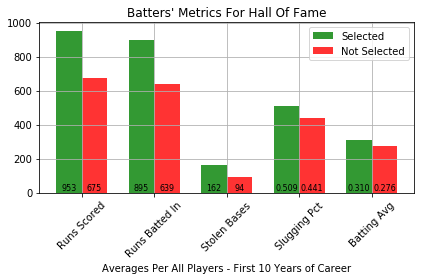

In [79]:

n_groups = 5
means_no  = X_graph_grouped.iloc[0, [6,7,8,9,1]]
means_yes = X_graph_grouped.iloc[1, [6,7,8,9,1]]

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_yes, bar_width,
alpha=opacity,
color='g',
label='Selected')

rects2 = plt.bar(index + bar_width, means_no, bar_width,
alpha=opacity,
color='r',
label='Not Selected')

plt.xlabel('Averages Per All Players - First 10 Years of Career')
plt.title("Batters' Metrics For Hall Of Fame")
plt.xticks(index + (bar_width/2), ('Runs Scored', 'Runs Batted In', 'Stolen Bases', 'Slugging Pct', 'Batting Avg' ), rotation=45)
plt.grid()
plt.legend()

# Use functions to label the percentages of changes
def valuelabel(rects, ptext):

    x = 0
    for rect in rects:
        height = rect.get_height()
        if height > 10:
            ypos = 2
        elif height > 0:
            ypos = height + 1   # not enough room in the bar, so display just over it
        elif height > -10:
            ypos = height - 5
        else:
            ypos = -6
            
        plt.text(rect.get_x() + rect.get_width() / 2, ypos, ptext[x], ha="center", va="bottom", fontsize=8)
        x += 1
 
# reverse the above rescaling so that we can show true values
means_yes[3] = means_yes[3] / 1000
means_yes[4] = means_yes[4] / 1000

# Call function to implement value labeling
chgx = pd.Series(["{:.0f}".format(means_yes[0]),
                  "{:.0f}".format(means_yes[1]),
                  "{:.0f}".format(means_yes[2]),
                  "{:.3f}".format(means_yes[3]),
                  "{:.3f}".format(means_yes[4]),
                 ])
valuelabel(rects1, chgx)

means_no[3] = means_no[3] / 1000
means_no[4] = means_no[4] / 1000

chgx = pd.Series(["{:.0f}".format(means_no[0]),
                  "{:.0f}".format(means_no[1]),
                  "{:.0f}".format(means_no[2]),
                  "{:.3f}".format(means_no[3]),
                  "{:.3f}".format(means_no[4]),
                 ])

valuelabel(rects2, chgx)

# Save the Figure
plt.savefig("batters_metrics.png", bbox_inches="tight")


plt.tight_layout()